In [43]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 50em; }</style>")) # увеличиваем высоту окна без прокрутки
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [34]:
# Автор: Костарев А.А, версия 0.1 от 12.03.21
# Выполнять ячейки строго в порядке следования
# Урок 2
#при запуске исправить путь к файлам csv на свой
#import modin.pandas as pm
import pandas as pd
import numpy as np
import json
import datetime
from datetime import datetime, time, timedelta
import csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
from scipy.stats import skew, mode
from IPython.display import display
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.style.use('fivethirtyeight') 

plt.rcParams["figure.figsize"] = [15, 9]
%config InlineBackend.figure_format = 'retina'

In [13]:
# Задание 1
# Импортируйте библиотеку Numpy и дайте ей псевдоним np.
# Создайте массив Numpy под названием a размером 5x2, то есть состоящий из 5 строк и 2 столбцов. 
# Первый столбец должен содержать числа 1, 2, 3, 3, 1, а второй - числа 6, 8, 11, 10, 7. 
# Будем считать, что каждый столбец - это признак, а строка - наблюдение. 
# Затем найдите среднее значение по каждому признаку, используя метод mean массива Numpy. 
# Результат запишите в массив mean_a, в нем должно быть 2 элемента.
print('Задание 1')
a = np.array([[1, 6], [2, 8], [3, 11], [3, 10], [1, 7]])
display(a)
mean_a = np.mean(a, axis=0, keepdims=True)
display(mean_a)

Задание 1


array([[ 1,  6],
       [ 2,  8],
       [ 3, 11],
       [ 3, 10],
       [ 1,  7]])

array([[2. , 8.4]])

In [15]:
# Задание 2
# Вычислите массив a_centered, отняв от значений массива “а” средние значения соответствующих признаков, 
# содержащиеся в массиве mean_a. Вычисление должно производиться в одно действие. 
# Получившийся массив должен иметь размер 5x2.
print('Задание 2')
a_centered = np.subtract(a, mean_a)
display(a_centered)

Задание 2


array([[-1. , -2.4],
       [ 0. , -0.4],
       [ 1. ,  2.6],
       [ 1. ,  1.6],
       [-1. , -1.4]])

In [16]:
# Задание 3
# Найдите скалярное произведение столбцов массива a_centered. В результате должна получиться 
# величина a_centered_sp. Затем поделите a_centered_sp на N-1, где N - число наблюдений.
print('Задание 3')
a1 = a_centered[:,0]
a2 = a_centered[:,1]
a_centered_sp=np.dot(a1,a2)
display(a_centered_sp)

N=a.shape[0]
display(N)

my_cov=a_centered_sp/(N-1)
display(my_cov)

Задание 3


8.0

5

2.0

In [17]:
# Задание 4
# В этом задании проверьте получившееся число, вычислив ковариацию еще одним способом - 
# с помощью функции np.cov. В качестве аргумента m функция np.cov должна принимать 
# транспонированный массив “a”. В получившейся ковариационной матрице (массив Numpy размером 2x2) 
# искомое значение ковариации будет равно элементу в строке с индексом 0 и столбце с индексом 1.
np.cov(a.transpose())

array([[1. , 2. ],
       [2. , 4.3]])

In [19]:
# Pandas
# Задание 1
# Создайте датафрейм authors со столбцами author_id и author_name, в которых соответственно содержатся данные:
# [1, 2, 3] и ['Тургенев', 'Чехов', 'Островский'].
authors = pd.DataFrame({'author_id' : [1, 2, 3], 'author_name' : ['Тургенев', 'Чехов', 'Островский']})
display(authors)

# Затем создайте датафрейм book cо столбцами author_id, book_title и price, в которых соответственно 
# содержатся данные:  [1, 1, 1, 2, 2, 3, 3],
# ['Отцы и дети', 'Рудин', 'Дворянское гнездо', 'Толстый и тонкий', 'Дама с собачкой', 'Гроза', 'Таланты и поклонники'],
# [450, 300, 350, 500, 450, 370, 290].
book = pd.DataFrame({'author_id' : [1, 1, 1, 2, 2, 3, 3], 
                     'book_title' : ['Отцы и дети', 'Рудин', 'Дворянское гнездо', 'Толстый и тонкий', 
                                     'Дама с собачкой', 'Гроза', 'Таланты и поклонники'],
                    'price' : [450, 300, 350, 500, 450, 370, 290]})
display(book)

,author_id,author_name
0,1,Тургенев
1,2,Чехов
2,3,Островский


,author_id,book_title,price
0,1,Отцы и дети,450
1,1,Рудин,300
2,1,Дворянское гнездо,350
3,2,Толстый и тонкий,500
4,2,Дама с собачкой,450
5,3,Гроза,370
6,3,Таланты и поклонники,290


In [38]:
# Задание 2:
# Получите датафрейм authors_price, соединив датафреймы authors и books по полю author_id:
authors_price = pd.merge(authors, book, on = 'author_id', how = 'right')
display(authors_price)

# Задание 3
# Создайте датафрейм top5, в котором содержатся строки из authors_price с пятью самыми дорогими книгами.
top5 = authors_price.sort_values(by = 'price', ascending = True)

fig = px.bar(top5.tail(10), y='book_title', x='price', orientation='h', text = 'price', color = 'price', 
            title = f'Топ-5 самых дорогих книг русских классиков:')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(uniformtext_minsize=9, uniformtext_mode='hide', yaxis_title="Название книги", 
                  xaxis_title= f"Цена")
print('\nСамая дорогая книга - "Толстый и тонкий", самая дешевая - "Таланты и поклонники".')
fig.show()

,author_id,author_name,book_title,price
0,1,Тургенев,Отцы и дети,450
1,1,Тургенев,Рудин,300
2,1,Тургенев,Дворянское гнездо,350
3,2,Чехов,Толстый и тонкий,500
4,2,Чехов,Дама с собачкой,450
5,3,Островский,Гроза,370
6,3,Островский,Таланты и поклонники,290



Самая дорогая книга - "Толстый и тонкий", самая дешевая - "Таланты и поклонники".


In [37]:
# Задание 4
# Создайте датафрейм authors_stat на основе информации из authors_price. 
# В датафрейме authors_stat должны быть четыре столбца:
# author_name, min_price, max_price и mean_price,
# в которых должны содержаться соответственно имя автора, минимальная, максимальная 
# и средняя цена на книги этого автора.
func4 = {'price': ['min', 'max', 'mean']}
authors_stat = authors_price.groupby(['author_name'], as_index=False).agg(func4).round(1)
authors_stat.columns = ['_'.join(col).rstrip('_') for col in authors_stat.columns.values]
print('Статистика цен на книги по авторам:')
display(authors_stat)

Статистика цен на книги по авторам:


,author_name,price_min,price_max,price_mean
0,Островский,290,370,330.0
1,Тургенев,300,450,366.7
2,Чехов,450,500,475.0


У Островского все книги в мягкой обложке, у Тургенева - 60% в мягкой. У Чехова все книги изданы в твердой обложке.


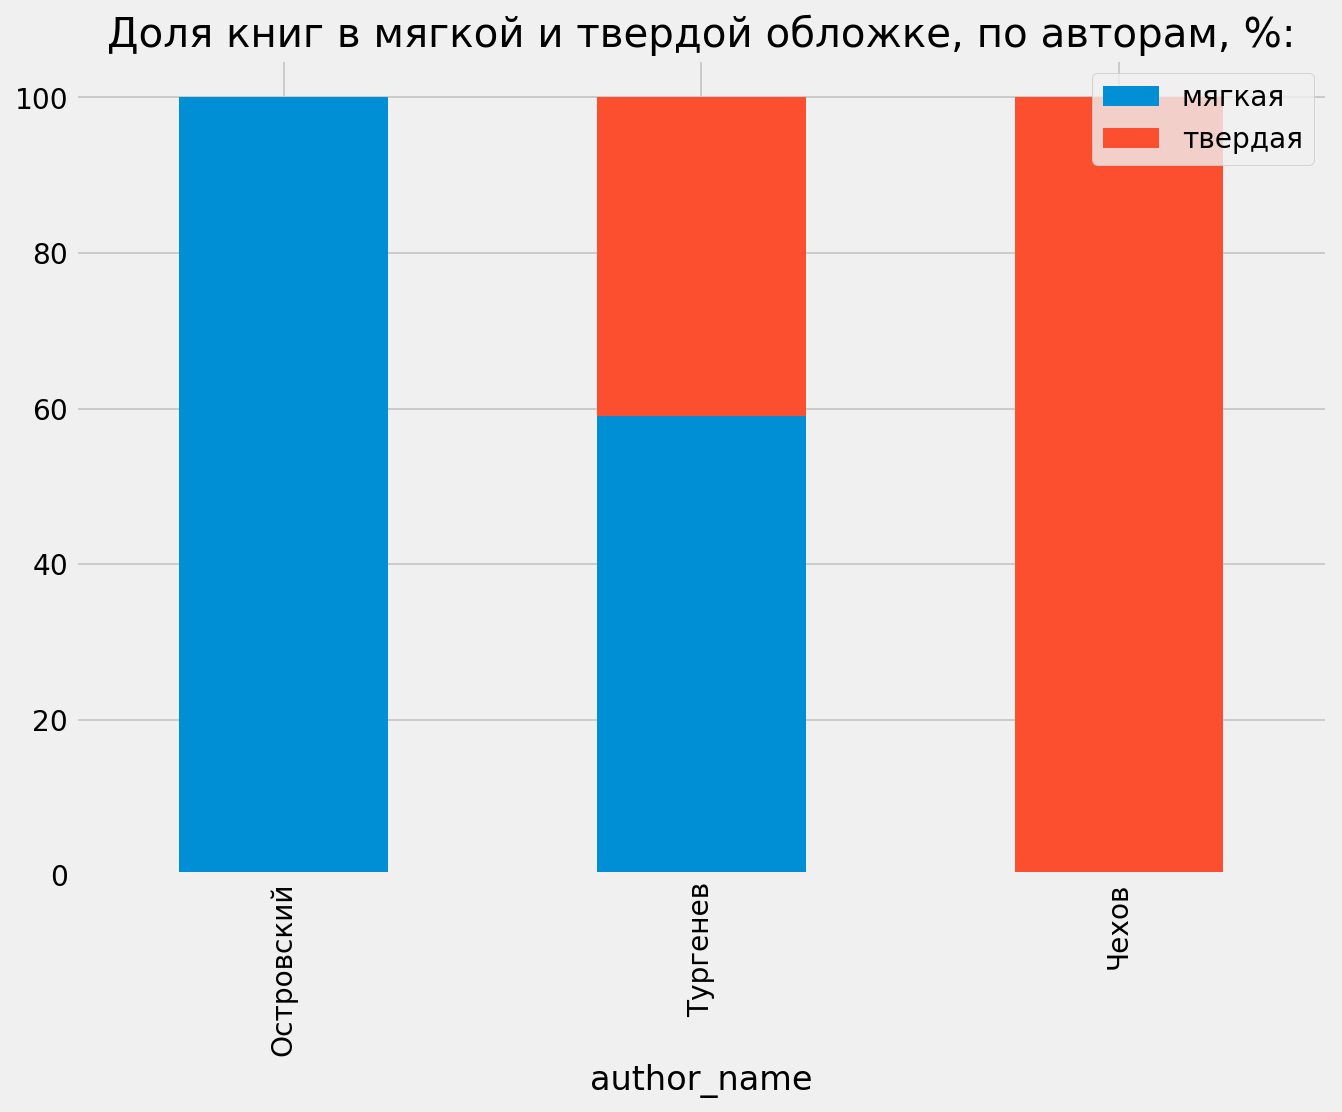

In [36]:
# Задание 5
# Создайте новый столбец в датафрейме authors_price под названием cover. 
# В этот столбец поместите данные из следующего списка:
cover_list = ['твердая', 'мягкая', 'мягкая', 'твердая', 'твердая', 'мягкая', 'мягкая']
authors_price['cover'] = pd.Series(cover_list).values

# Сводная таблица:
book_info = pd.pivot_table(
authors_price,
index = 'author_name',
columns='cover',
values='price',
aggfunc=np.sum)
#margins=True)

book_info = book_info.fillna(0)

#Приведем ячейки из абсолютных величин в относительные:
book_info = book_info.div(book_info.sum(axis=1), axis=0)*100

book_info.plot.bar(stacked=True, figsize=(10,7))
plt.title('Доля книг в мягкой и твердой обложке, по авторам, %:')
plt.legend(loc = 'best')
print('У Островского все книги в мягкой обложке, у Тургенева - 60% в мягкой. У Чехова все книги изданы в твердой обложке.')
plt.show()

In [41]:
# Назовите полученный датасет book_info и сохраните его в формат pickle под названием "book_info.pkl". 
book_info.to_pickle('book_info.pkl') 

# Затем загрузите из этого файла датафрейм и назовите его book_info2. 
book_info2 = pd.read_pickle('book_info.pkl')

# Удостоверьтесь, что датафреймы book_info и book_info2 идентичны.
test = book_info.merge(book_info2, how='outer', indicator=True)[lambda r: r._merge == 'right_only']
print('Сравнение исходной и загруженной таблиц (показать разницу):\n')
print (test)

Сравнение исходной и загруженной таблиц (показать разницу):

Empty DataFrame
Columns: [мягкая, твердая, _merge]
Index: []
